Dataset Preview:
            Passengers
Month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121


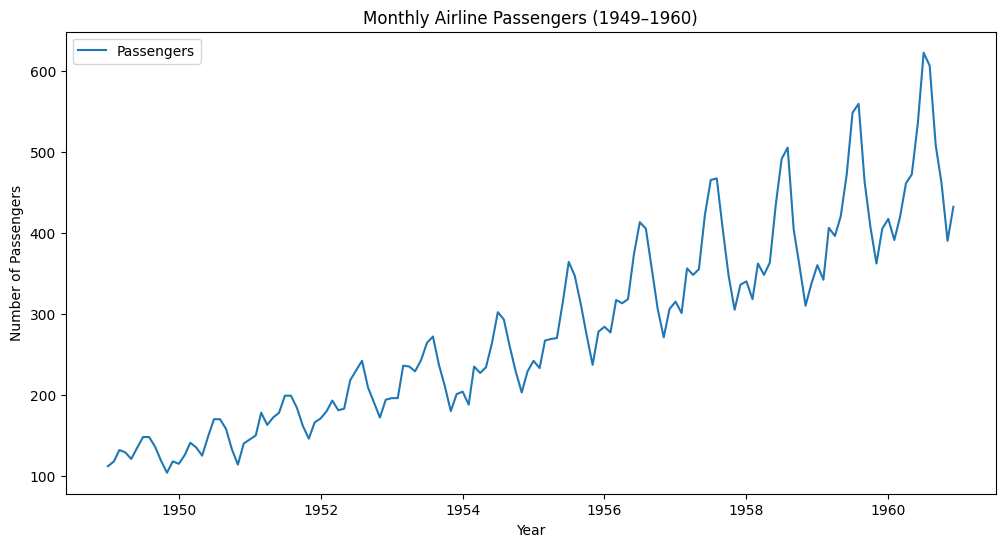

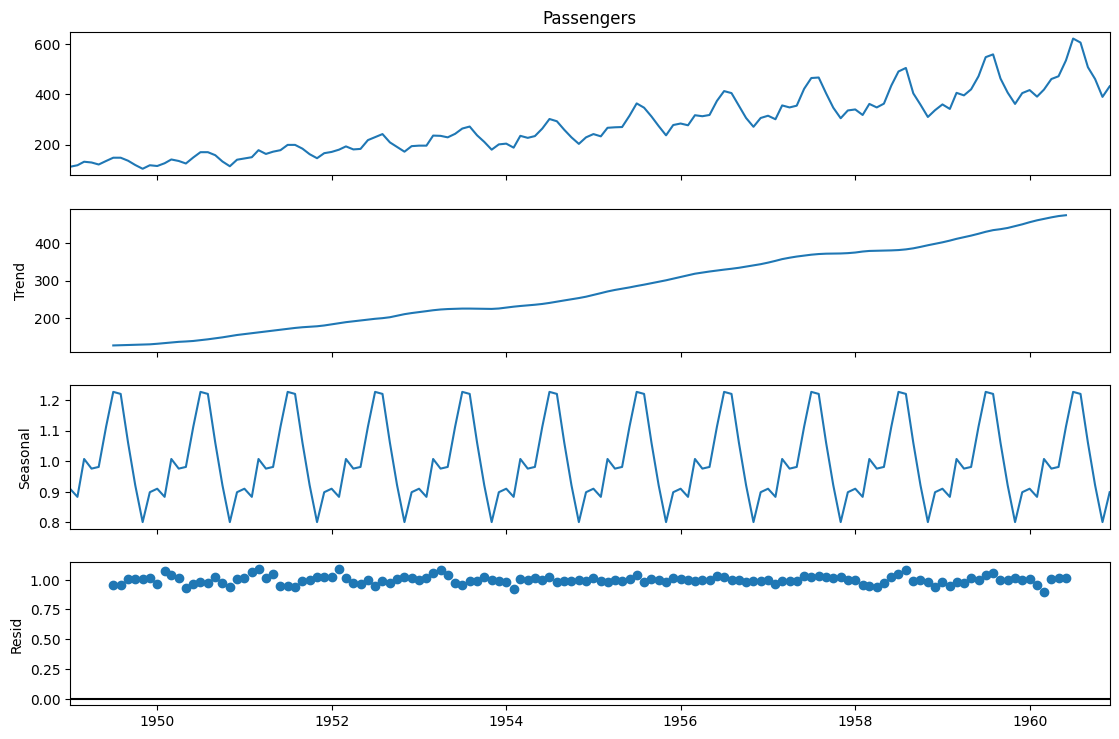

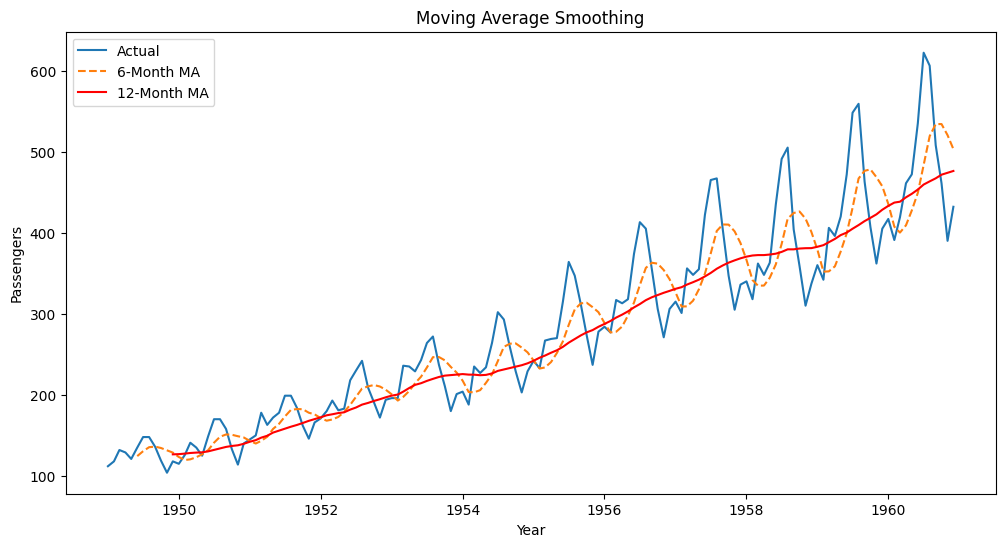

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Us

RMSE: 21.17


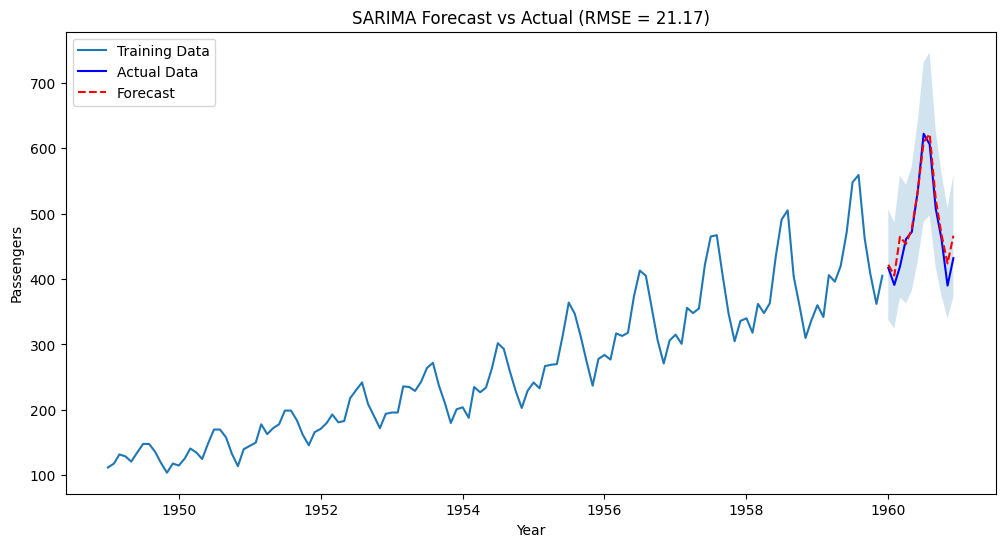

In [2]:
# =========================================
# Task 3: Time Series Analysis using Python
# Airline Passengers Dataset (1949–1960)
# =========================================

# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# -----------------------------------------
# 2. Load Dataset
# -----------------------------------------
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"

df = pd.read_csv(
    url,
    parse_dates=['Month'],
    index_col='Month'
)

print("Dataset Preview:")
print(df.head())

# -----------------------------------------
# 3. Plot Original Time Series
# -----------------------------------------
plt.figure(figsize=(12,6))
plt.plot(df['Passengers'], label='Passengers')
plt.title('Monthly Airline Passengers (1949–1960)')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

# -----------------------------------------
# 4. Trend & Seasonality Decomposition
# -----------------------------------------
decomposition = seasonal_decompose(df['Passengers'], model='multiplicative')

fig = decomposition.plot()
fig.set_size_inches(12,8)
plt.show()

# -----------------------------------------
# 5. Moving Averages (Visualization Only)
# -----------------------------------------
df['MA_6'] = df['Passengers'].rolling(window=6).mean()
df['MA_12'] = df['Passengers'].rolling(window=12).mean()

plt.figure(figsize=(12,6))
plt.plot(df['Passengers'], label='Actual')
plt.plot(df['MA_6'], linestyle='--', label='6-Month MA')
plt.plot(df['MA_12'], color='red', label='12-Month MA')
plt.title('Moving Average Smoothing')
plt.xlabel('Year')
plt.ylabel('Passengers')
plt.legend()
plt.show()

# -----------------------------------------
# 6. Train-Test Split (UNIVARIATE ✔)
# -----------------------------------------
train = df['Passengers'].iloc[:-12]
test = df['Passengers'].iloc[-12:]

# -----------------------------------------
# 7. SARIMA Model
# -----------------------------------------
model = ARIMA(
    train,
    order=(2,1,1),
    seasonal_order=(1,1,1,12)
)

model_fit = model.fit()

# -----------------------------------------
# 8. Forecasting
# -----------------------------------------
forecast = model_fit.forecast(steps=12)

# -----------------------------------------
# 9. Model Evaluation
# -----------------------------------------
rmse = np.sqrt(mean_squared_error(test, forecast))
print(f"RMSE: {rmse:.2f}")

# -----------------------------------------
# 10. Plot Forecast vs Actual
# -----------------------------------------
plt.figure(figsize=(12,6))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Actual Data', color='blue')
plt.plot(test.index, forecast, label='Forecast', color='red', linestyle='--')

plt.fill_between(
    test.index,
    forecast * 0.8,
    forecast * 1.2,
    alpha=0.2
)

plt.title(f'SARIMA Forecast vs Actual (RMSE = {rmse:.2f})')
plt.xlabel('Year')
plt.ylabel('Passengers')
plt.legend()
plt.show()
